## import necessary libary

In [47]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
url = "CarPrice_Assignment.csv"

In [49]:
df = pd.read_csv(url )
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## check null value

In [50]:
null_sum = df.isnull().sum().sum()

print("Sum of null values:", null_sum)

Sum of null values: 0


In [51]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in car_ID:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]

Unique values in symboling:
[ 3  1  2  0 -1 -2]

Unique values in CarName:
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifog

## plot the relationship


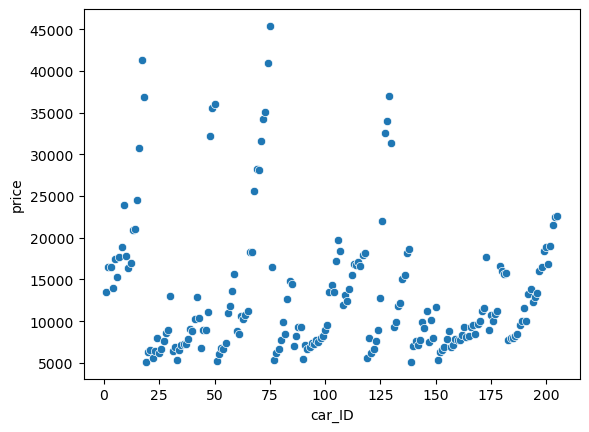

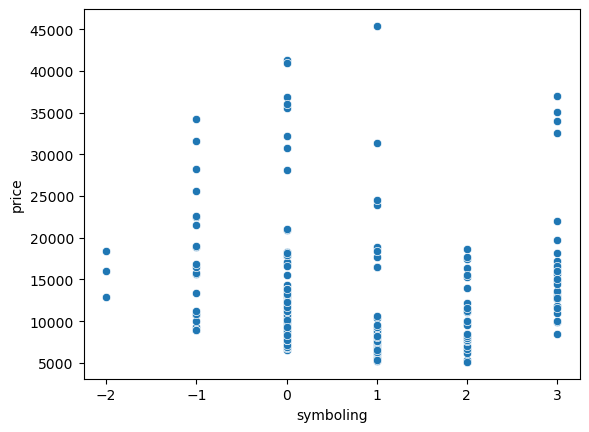

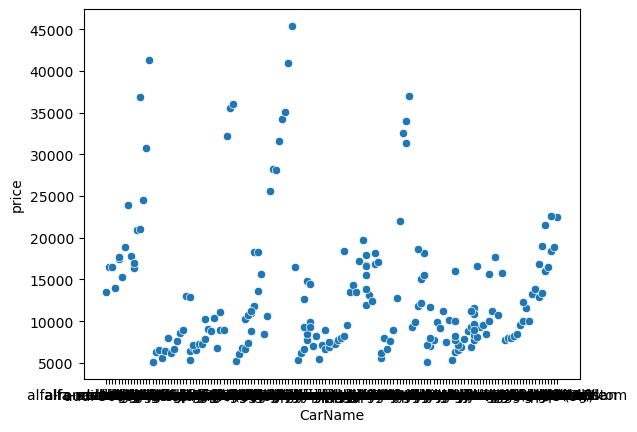

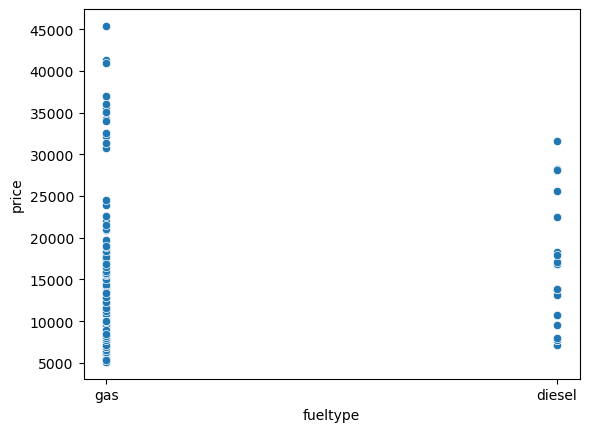

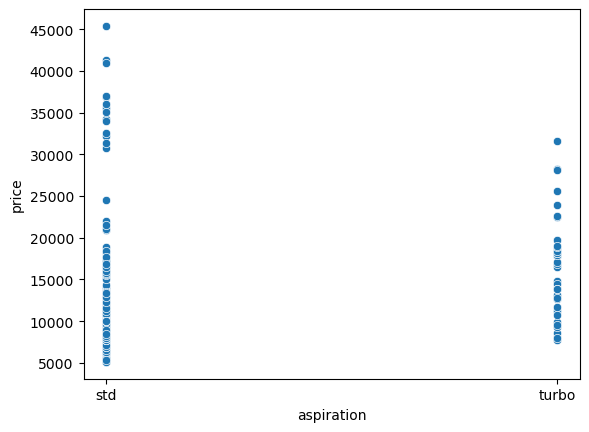

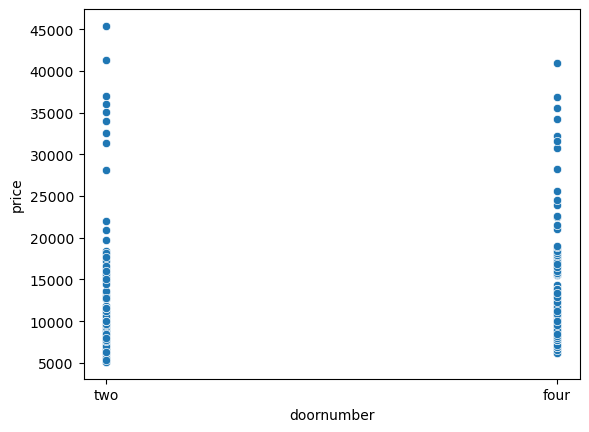

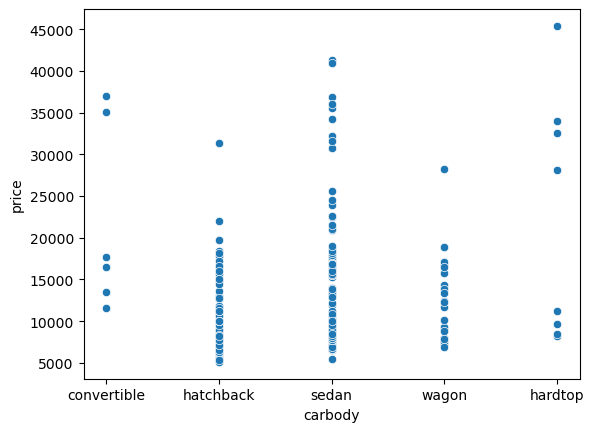

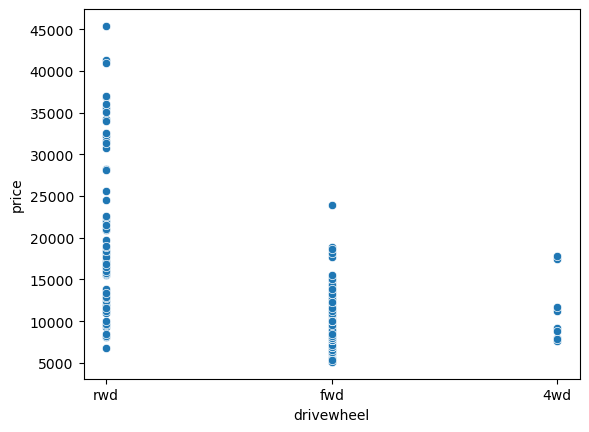

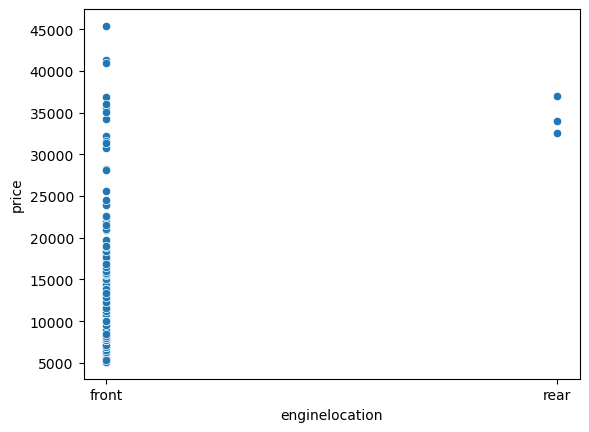

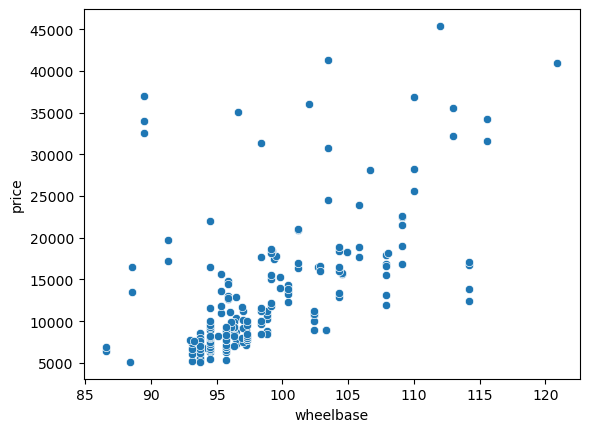

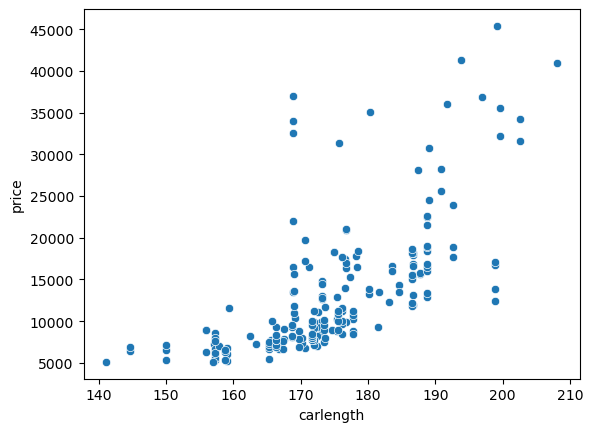

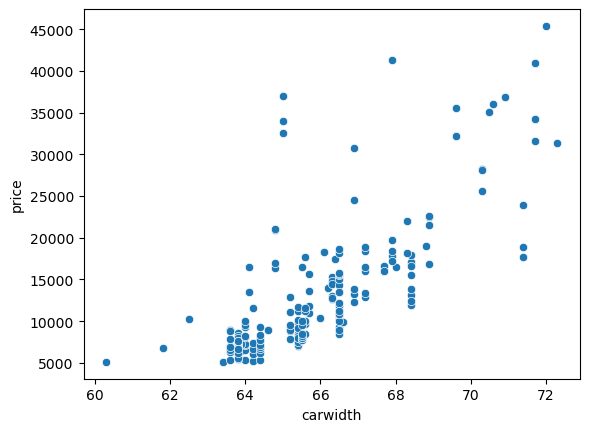

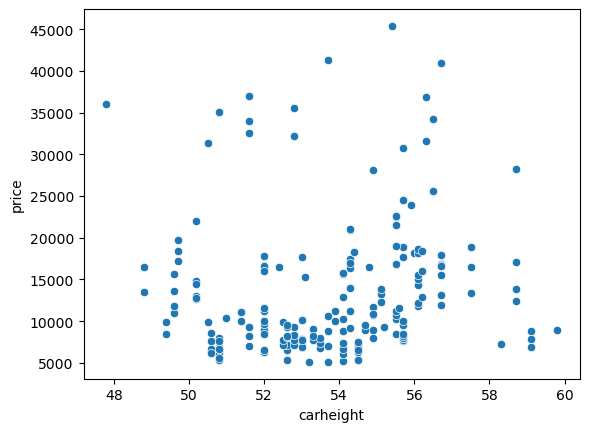

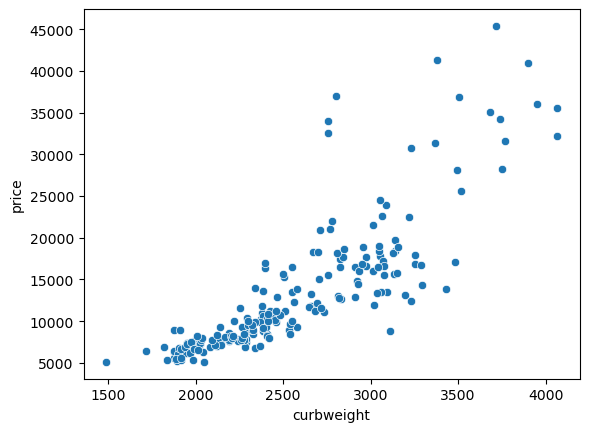

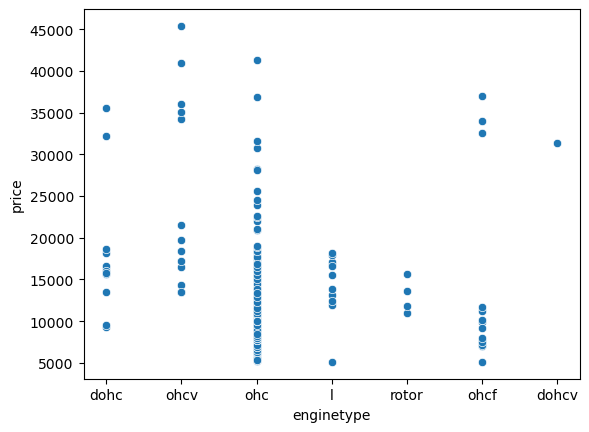

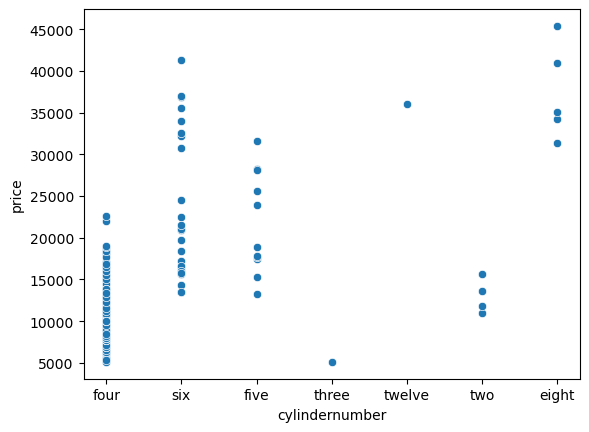

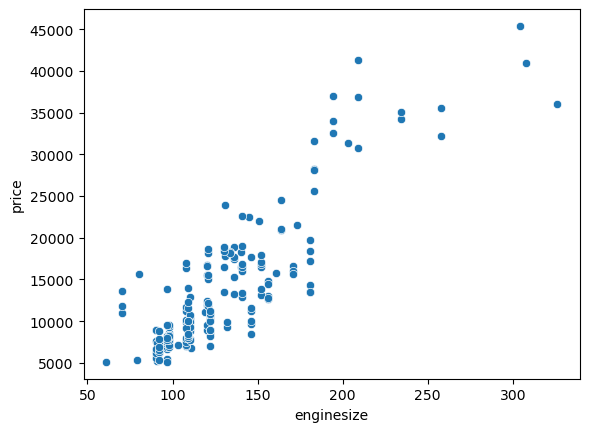

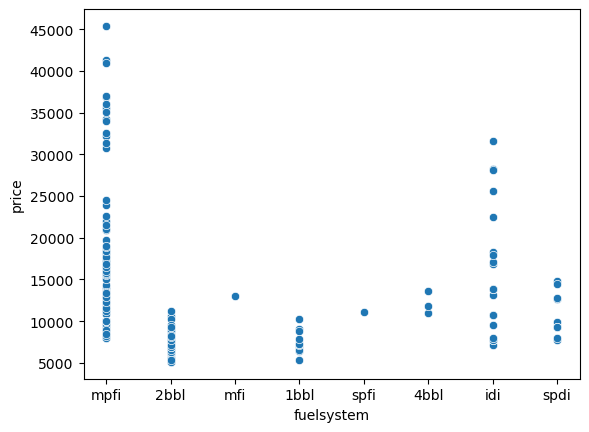

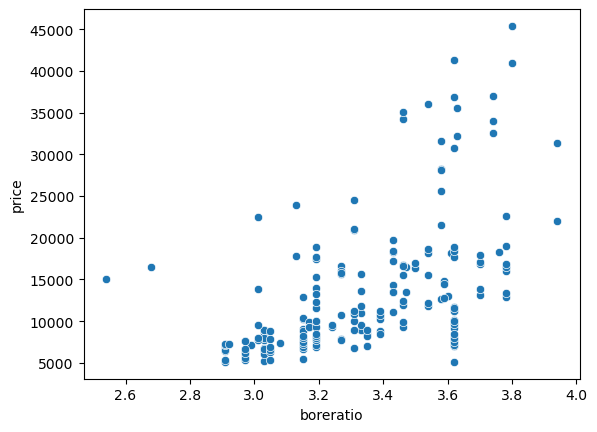

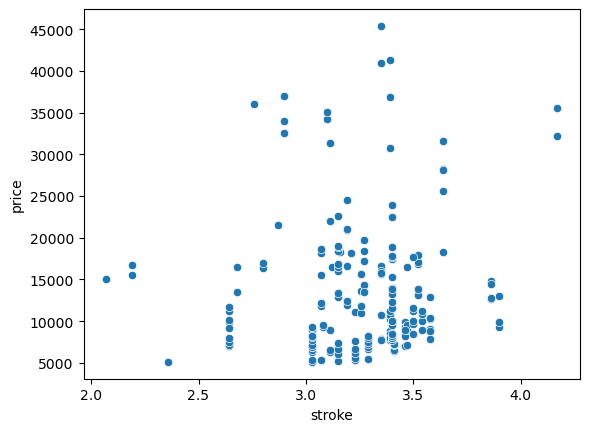

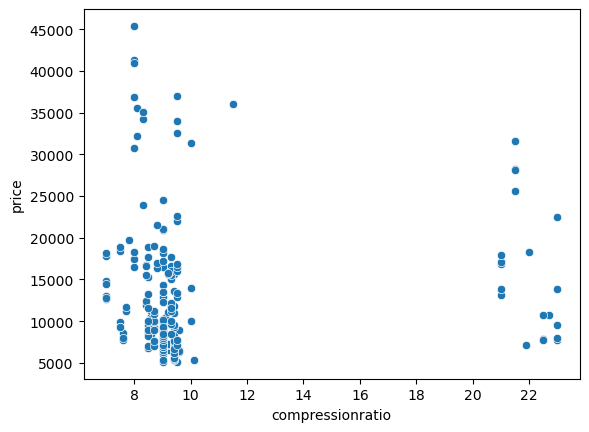

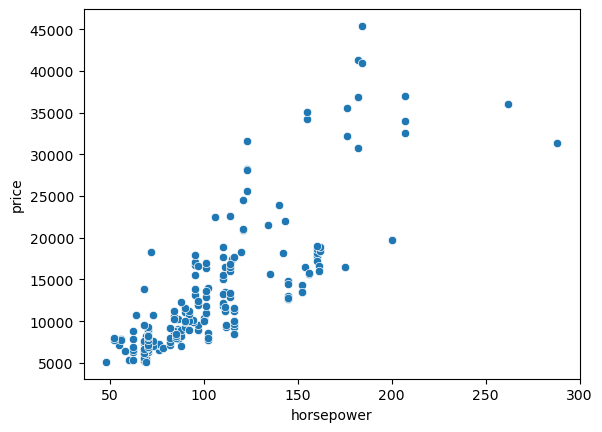

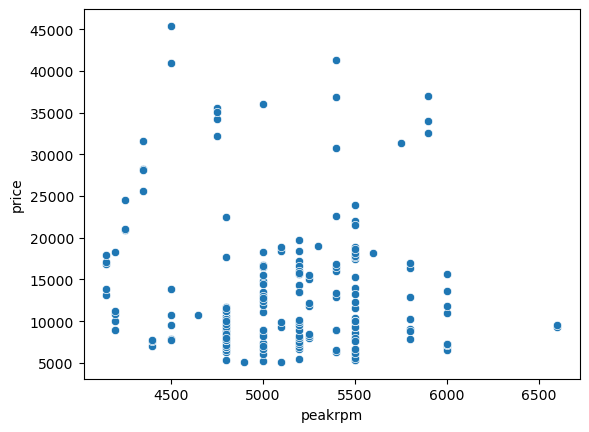

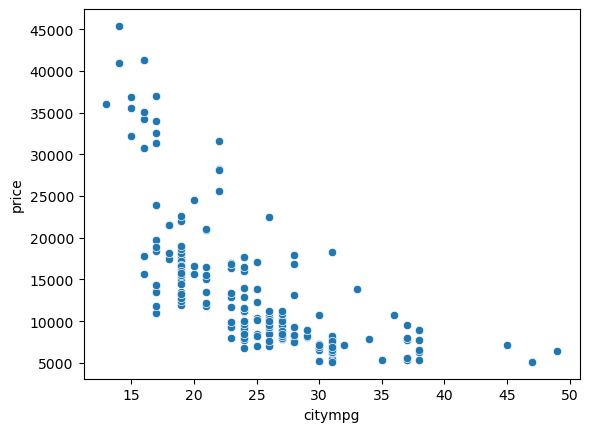

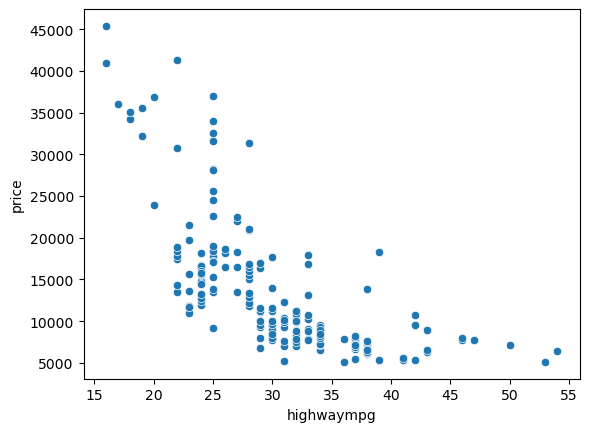

Correlation matrix:
                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.

In [52]:
target_variable = 'price'
for column in df.columns[:-1]:  # Exclude the target variable column
    sns.scatterplot(x=column, y=target_variable, data=df)
    plt.show()

# Calculate correlation coefficients
correlation_matrix = df.corr()
print("Correlation matrix:")
print(correlation_matrix)

## Data preprocessing

In [53]:
df['brand_car_name'] = df['CarName'].str.split().str[0]
df = df.drop('CarName', axis=1)

In [54]:
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand_car_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [55]:
print(df['brand_car_name'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [57]:
corrections = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

df['brand_car_name'].replace(corrections, inplace=True)

print(df['brand_car_name'])

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: brand_car_name, Length: 205, dtype: object


In [58]:
df2 = pd.DataFrame(df)

In [59]:
df2 = df2[['wheelbase','carlength','carwidth','curbweight','cylindernumber','enginesize','boreratio','horsepower','citympg','highwaympg','brand_car_name','price']]
df2

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,brand_car_name,price
0,88.6,168.8,64.1,2548,four,130,3.47,111,21,27,alfa-romero,13495.0
1,88.6,168.8,64.1,2548,four,130,3.47,111,21,27,alfa-romero,16500.0
2,94.5,171.2,65.5,2823,six,152,2.68,154,19,26,alfa-romero,16500.0
3,99.8,176.6,66.2,2337,four,109,3.19,102,24,30,audi,13950.0
4,99.4,176.6,66.4,2824,five,136,3.19,115,18,22,audi,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,four,141,3.78,114,23,28,volvo,16845.0
201,109.1,188.8,68.8,3049,four,141,3.78,160,19,25,volvo,19045.0
202,109.1,188.8,68.9,3012,six,173,3.58,134,18,23,volvo,21485.0
203,109.1,188.8,68.9,3217,six,145,3.01,106,26,27,volvo,22470.0


## Visualize relationships with heatmap

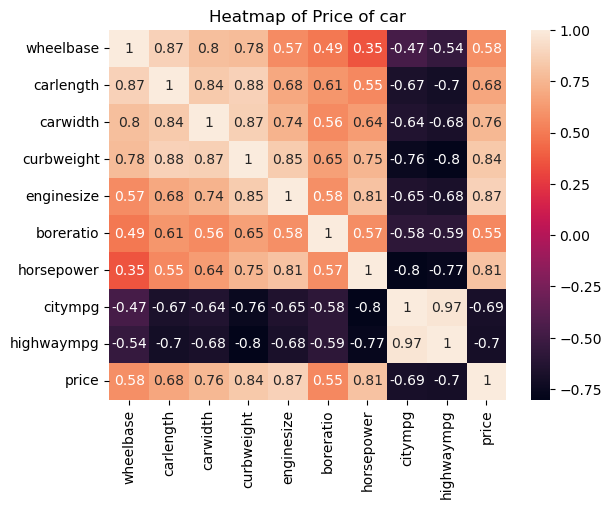

In [60]:
correlations = df2.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Price of car');

## Encoding data 

In [61]:
df2 = pd.get_dummies(df2, columns=['brand_car_name'])
df2.replace({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}, inplace=True)


In [62]:
df2

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,...,brand_car_name_nissan,brand_car_name_peugeot,brand_car_name_plymouth,brand_car_name_porsche,brand_car_name_renault,brand_car_name_saab,brand_car_name_subaru,brand_car_name_toyota,brand_car_name_volkswagen,brand_car_name_volvo
0,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,2823,6,152,2.68,154,19,26,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,2337,4,109,3.19,102,24,30,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,2824,5,136,3.19,115,18,22,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,4,141,3.78,114,23,28,...,0,0,0,0,0,0,0,0,0,1
201,109.1,188.8,68.8,3049,4,141,3.78,160,19,25,...,0,0,0,0,0,0,0,0,0,1
202,109.1,188.8,68.9,3012,6,173,3.58,134,18,23,...,0,0,0,0,0,0,0,0,0,1
203,109.1,188.8,68.9,3217,6,145,3.01,106,26,27,...,0,0,0,0,0,0,0,0,0,1


## visualize significant features

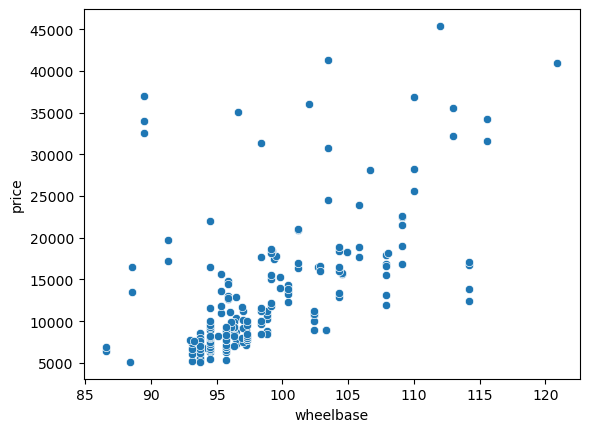

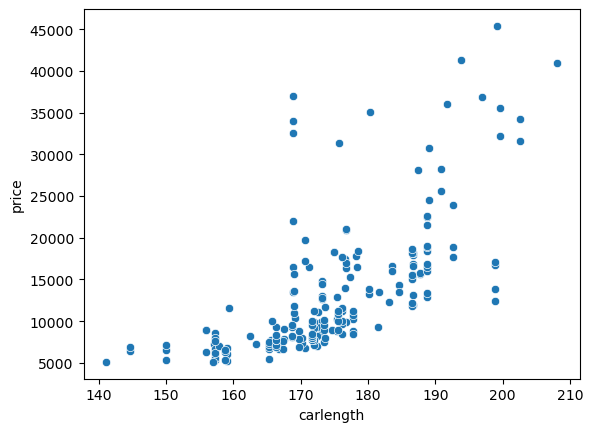

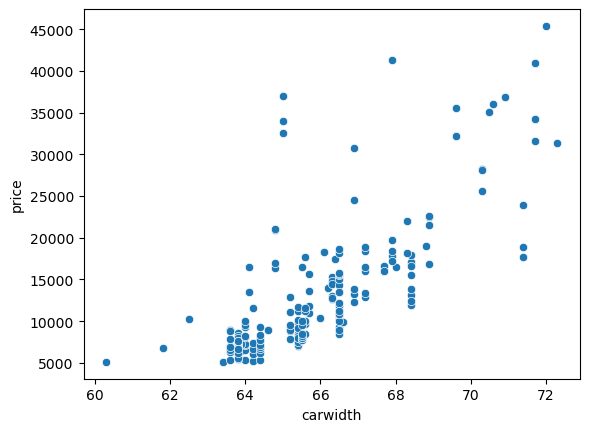

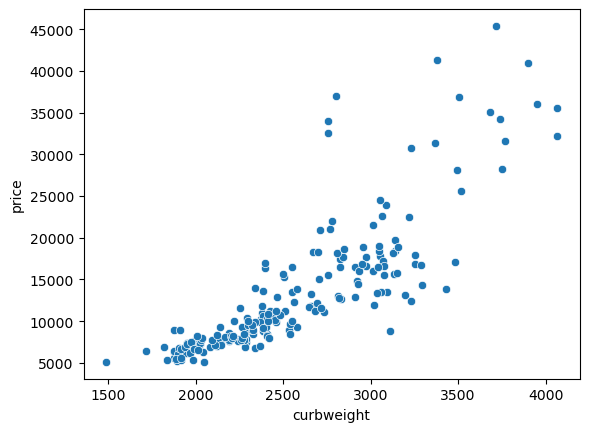

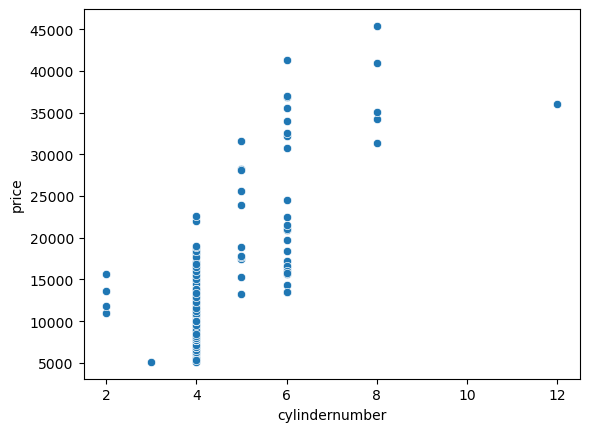

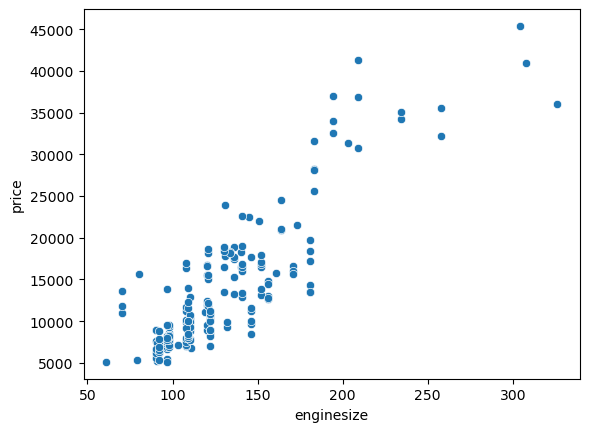

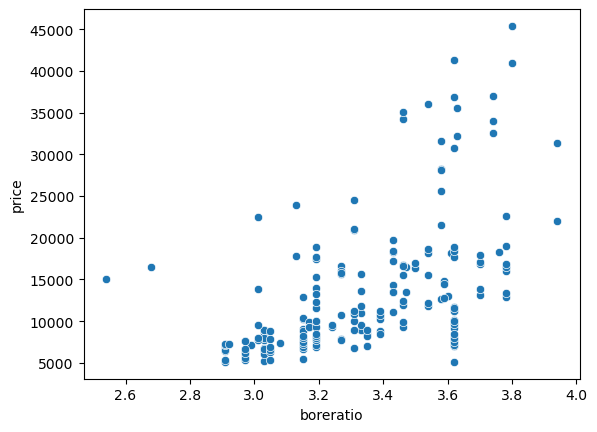

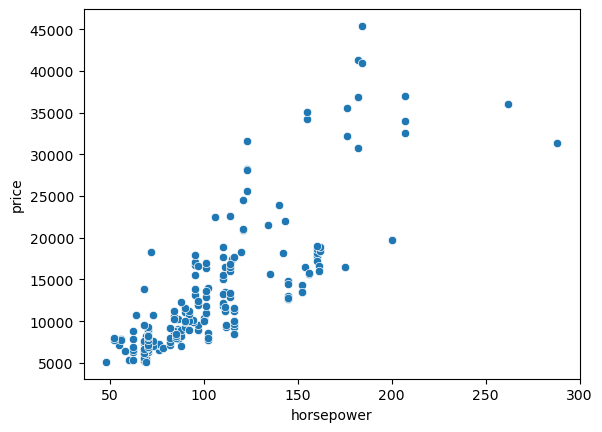

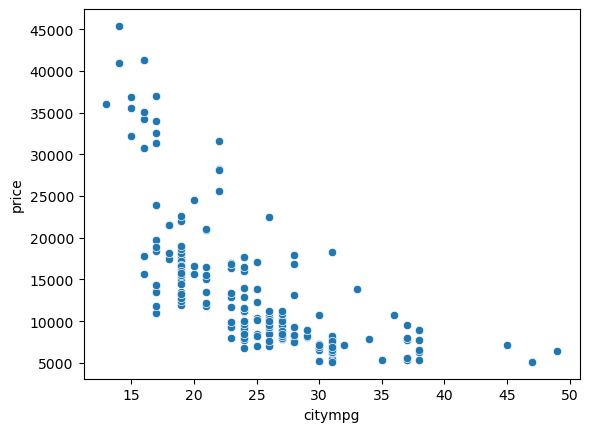

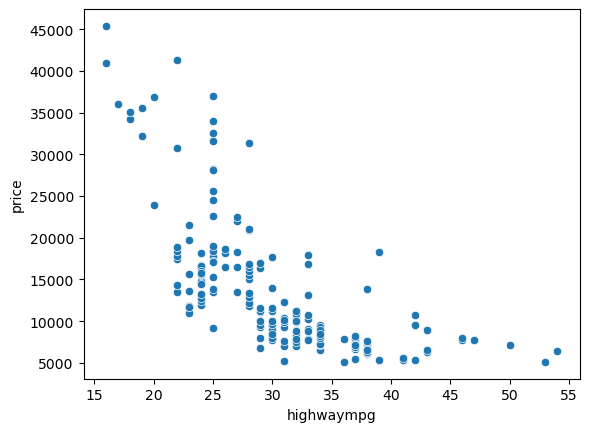

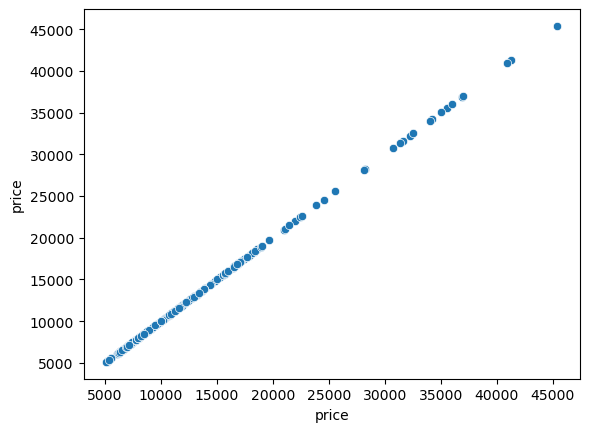

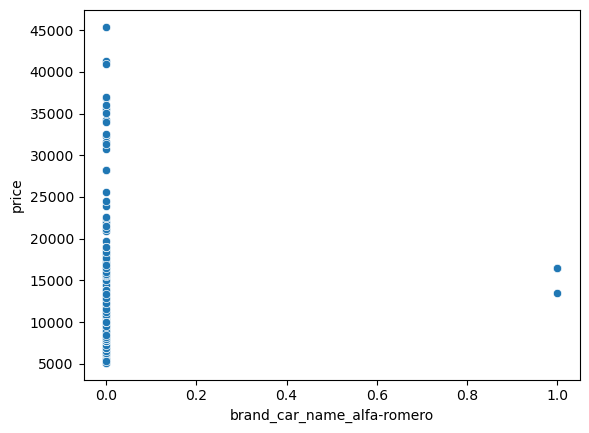

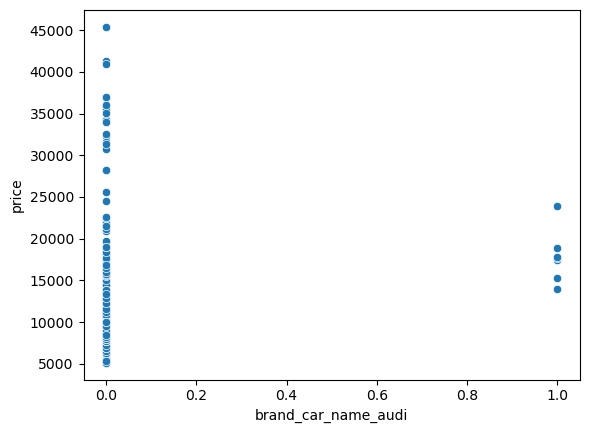

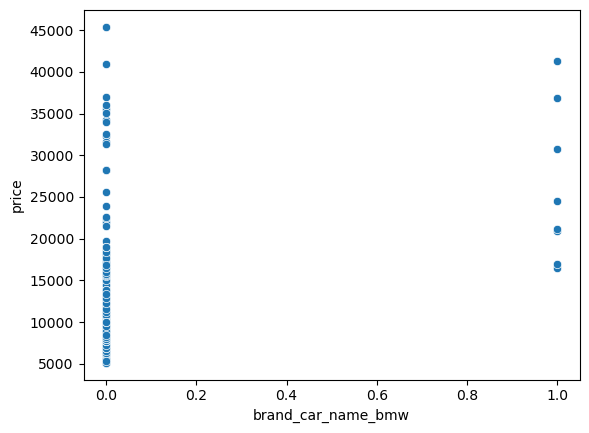

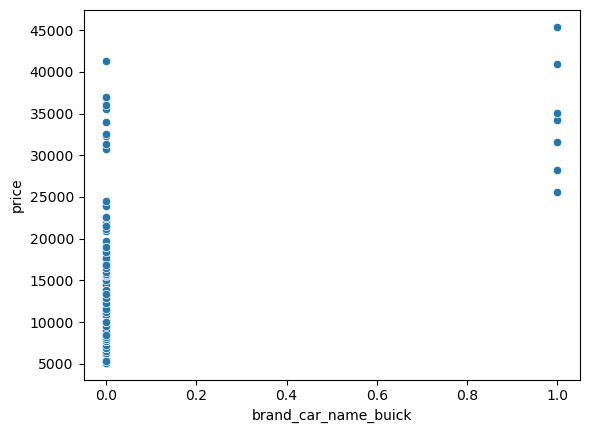

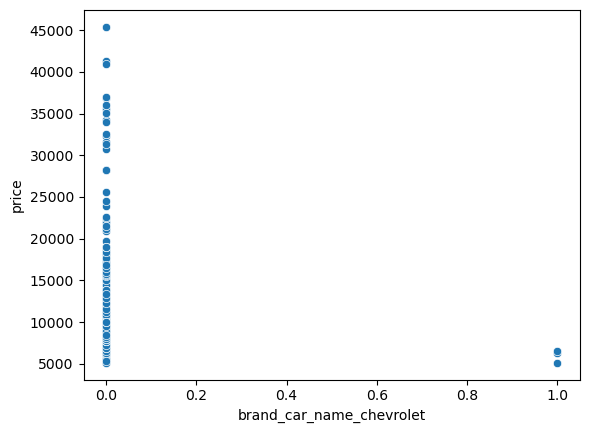

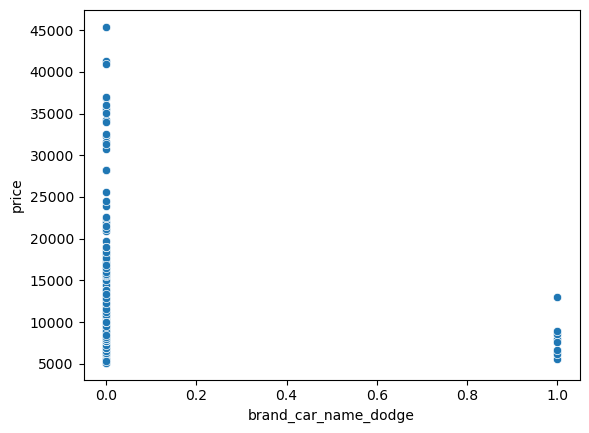

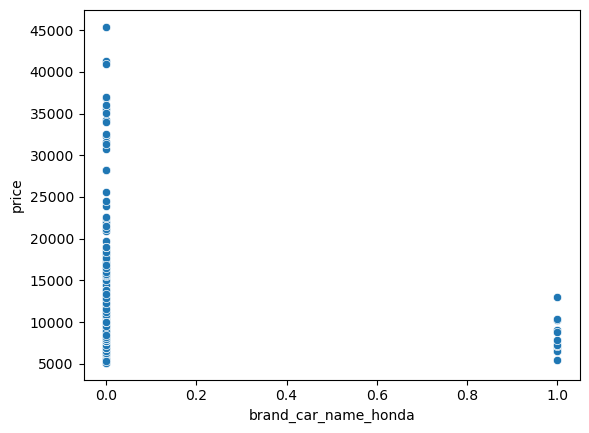

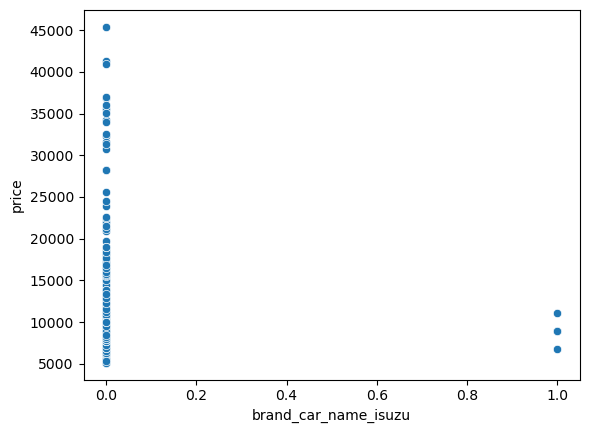

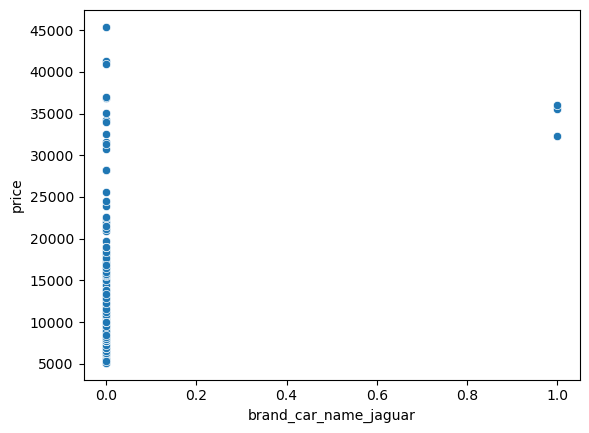

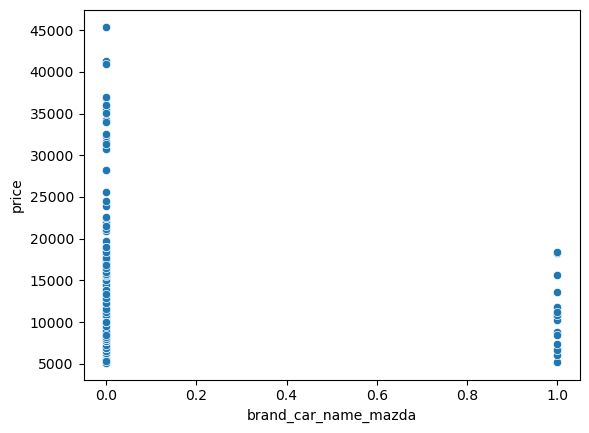

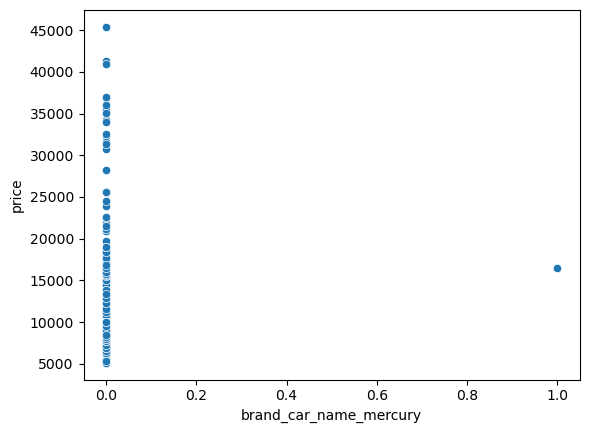

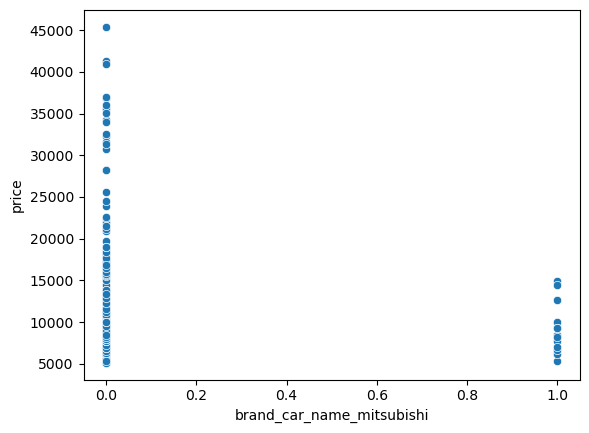

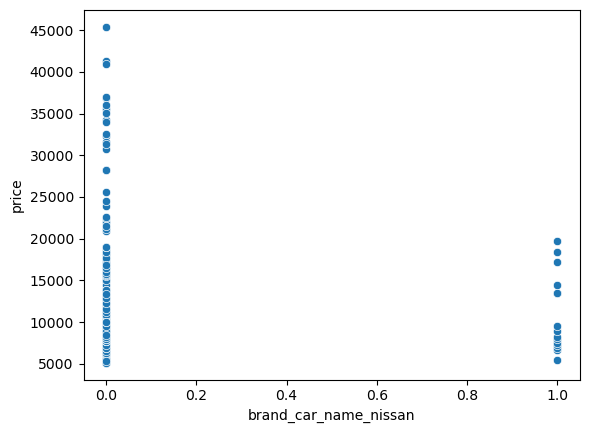

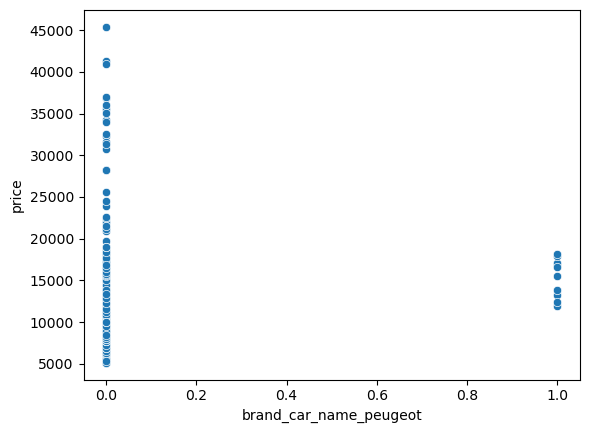

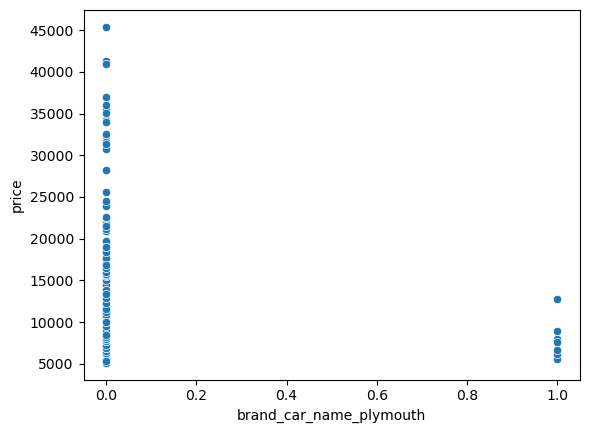

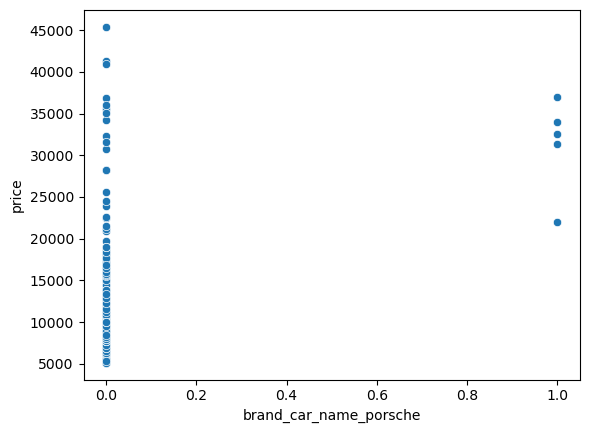

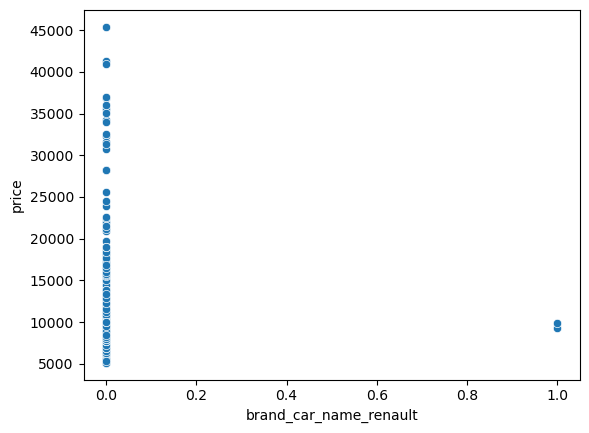

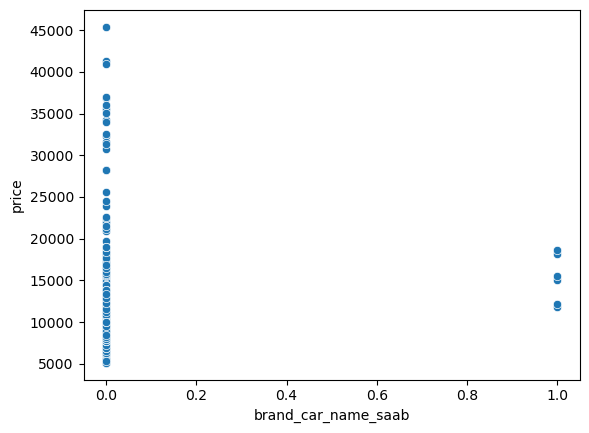

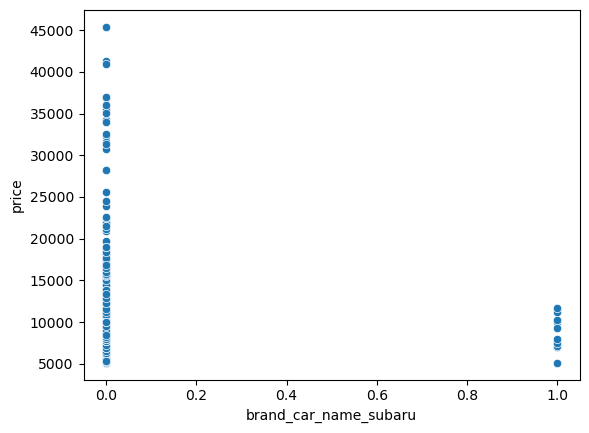

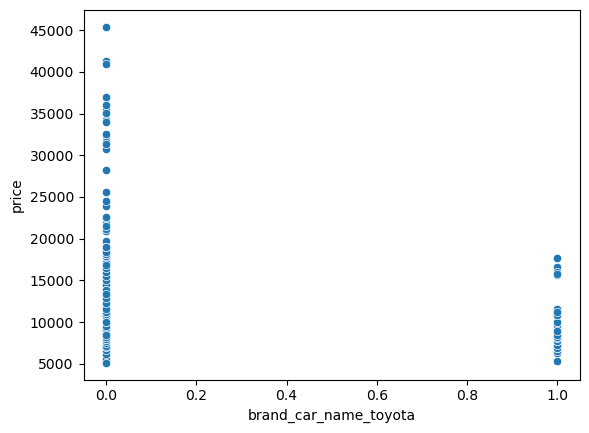

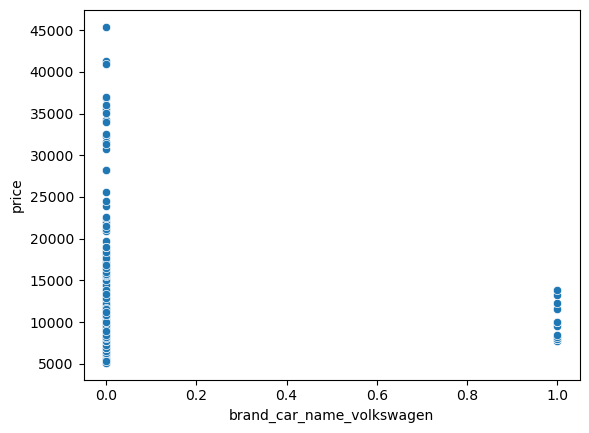

In [68]:
target_variable = 'price'
for column in df2.columns[:-1]:  # Exclude the target variable column
    sns.scatterplot(x=column, y=target_variable, data=df2)
    plt.show()


In [69]:
X = df2.drop('price', axis=1)
y = df2['price']
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=SEED)

In [70]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

        Actual     Predicted
15   30760.000  29836.316197
9    17859.167  20739.519624
100   9549.000   9355.139640
132  11850.000  13620.105908
68   28248.000  33492.386374
..         ...           ...
56   11845.000  10695.654003
128  37028.000  29968.500106
76    5389.000   5769.068692
144   9233.000   8934.827550
104  17199.000  17757.058820

[62 rows x 2 columns]


In [72]:
# Evaluate model performance on test data using mean absolute error, mean squared error, root mean squared error, and R-squared
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f'Mean squared error: ${mse:,.2f}')
print(f'Root mean squared error: ${rmse:,.2f}')
print(f'R-squared: {r2:.2f}')

Mean squared error: $8,624,498.00
Root mean squared error: $2,936.75
R-squared: 0.88
